# k-최근접 이웃 회귀(Regression)

### 알고리즘

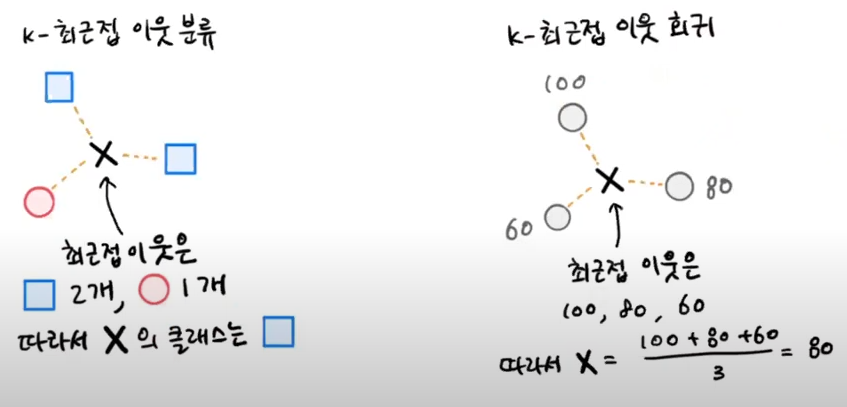

### Q] 농어 무게를 예측하는데 빙어 데이터를 활용해야 할까?

## 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
len(perch_length), len(perch_weight)

(56, 56)

In [4]:
import matplotlib.pyplot as plt

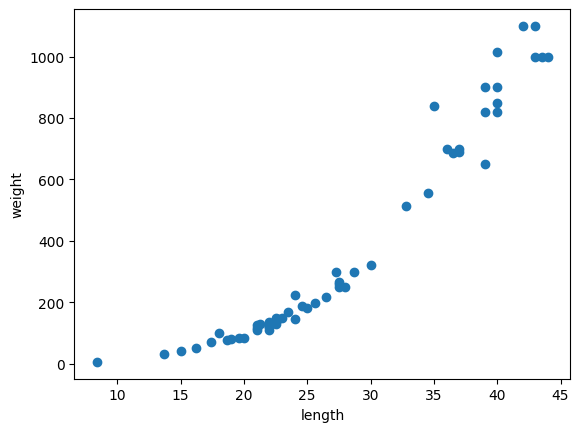

In [5]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

### 위 데이터 분배시 strafify옵션을 사용하지 않은 이유는?

### 차원변환

In [8]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [9]:
# k-최근접 모델을 학습시키기 위해서 특성값이 2차원배열이 되어야 하기 때문에 아래와 같이 차원을 바꿈
# 일반적으로 특성은 N개이기 때문이다. 
# 현재 특성을 1차원 배열로 생성했으므로 2차원으로 변환
# reshape: (-1,1) 열의 차원을 1로 고정하고 행은 데이터에 맞게 재 할당하겠다는 의미
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [10]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 선형회귀 평가 방식
* 분류 모델은 평가를 정확도로 하지만 선형회귀모델은 정확도 이외에 다양한 방식으로 평가
* k 최근접 모델은 R 스퀘어 방식으로 평가하는 score 함수를 제공함
* $ R^2$ (결정 계수)

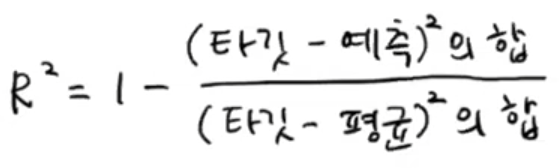
* 정확히 예측할 수록 1에 가까운 값을 예측

In [11]:
# 일반적으로 분류 모델은 ...Classifier, 선형회귀모델은 ...Regressor
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [13]:
knr.score(test_input, test_target)

0.992809406101064

### 평균절대오차(MAE: Mean Absolute Error) 방식으로 평가

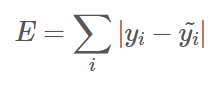
* 값이 적을 수록 예측값이 실제값에 수렴하여 예측했다고 볼 수 있다.

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합(Overfitting) vs 과소적합(Underfitting)
* 과대적합 :
 - 훈련셋의 결과가 테스트셋 결과보다 좋게 나오는경우
 - 너무 많은 데이터로 학습이 된 경우 => 모델이 훈련셋에 지나치게 최적화 된 경우
 - 모델이 훈련셋에 맞게 하이퍼파라메터가 최적화 된 경우

* 과소적합 :
 - 테스트셋의 결과가 훈련셋 결과보다 좋게 나오는 경우
 - 적은 데이터로 모델이 학습이 된 경우 => 학습데이터가 적어서 우연히 훈련결과가 좋게 나온 경우
 - 모델의 하이퍼파라메터가 최적화 되지 않은 경우 발생

#### 가장좋은 것은 훈련셋의 결과와 테스트셋의 결과가 거의 동일해야 한다.
* 훈련셋의 결과와 테스트셋 결과의 간극을 줄이는 노력을 해야 한다.

### 훈련셋 평가결과

In [32]:
print(knr.score(train_input, train_target))

0.96164569026043


### 테스트셋 평가결과

In [33]:
print(knr.score(test_input, test_target))

0.9737908255822255


In [34]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [35]:
print(knr.score(test_input, test_target))

0.9746459963987609


In [36]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()

In [37]:
from operator import itemgetter
score_info=[]
for n in range(1,42+1):
    n_data={}
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    train_score = knr.score(train_input, train_target)
    test_score = knr.score(test_input, test_target)
    
    n_data['n_neighbors']=n
    n_data['train_score'] = train_score
    n_data['test_score'] = test_score
    n_data['score_difference'] = abs(train_score-test_score)
    
    score_info.append(n_data)

In [38]:
score_info[:10]

[{'n_neighbors': 1,
  'train_score': 0.9852830341215901,
  'test_score': 0.991309195814175,
  'score_difference': 0.006026161692584853},
 {'n_neighbors': 2,
  'train_score': 0.9828437127041165,
  'test_score': 0.9725010241788556,
  'score_difference': 0.010342688525260879},
 {'n_neighbors': 3,
  'train_score': 0.9804899950518966,
  'test_score': 0.9746459963987609,
  'score_difference': 0.005843998653135674},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864},
 {'n_neighbors': 5,
  'train_score': 0.9698823289099254,
  'test_score': 0.992809406101064,
  'score_difference': 0.022927077191138623},
 {'n_neighbors': 6,
  'train_score': 0.9757140960298665,
  'test_score': 0.9855001139899048,
  'score_difference': 0.009786017960038307},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891},
 {'n_neighbors': 8,
  'train_score': 0

### 훈련데이터 점수 Top5

In [23]:
sorted(score_info, key=itemgetter('train_score'), reverse=True)[:5]

[{'n_neighbors': 1,
  'train_score': 0.9852830341215901,
  'test_score': 0.991309195814175,
  'score_difference': 0.006026161692584853},
 {'n_neighbors': 2,
  'train_score': 0.9828437127041165,
  'test_score': 0.9725010241788556,
  'score_difference': 0.010342688525260879},
 {'n_neighbors': 3,
  'train_score': 0.9804899950518966,
  'test_score': 0.9746459963987609,
  'score_difference': 0.005843998653135674},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891}]

### 시험데이터 점수 Top5

In [24]:
sorted(score_info, key=itemgetter('test_score'), reverse=True)[:5]

[{'n_neighbors': 5,
  'train_score': 0.9698823289099254,
  'test_score': 0.992809406101064,
  'score_difference': 0.022927077191138623},
 {'n_neighbors': 1,
  'train_score': 0.9852830341215901,
  'test_score': 0.991309195814175,
  'score_difference': 0.006026161692584853},
 {'n_neighbors': 6,
  'train_score': 0.9757140960298665,
  'test_score': 0.9855001139899048,
  'score_difference': 0.009786017960038307},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891}]

### 훈련데이터, 시험데이터 차이가 작은 순서 5

In [25]:
# 6.626178285862316e-05 => 6.626178285862316 * 10 의 -5승 = 0.00006626178285862316
sorted(score_info, key=itemgetter('score_difference') )[:5]

[{'n_neighbors': 9,
  'train_score': 0.9693310367551284,
  'test_score': 0.9692647749722698,
  'score_difference': 6.626178285862316e-05},
 {'n_neighbors': 35,
  'train_score': 0.39478071361200084,
  'test_score': 0.3957495287182914,
  'score_difference': 0.0009688151062905437},
 {'n_neighbors': 7,
  'train_score': 0.9761170732051527,
  'test_score': 0.9781383949643516,
  'score_difference': 0.002021321759198891},
 {'n_neighbors': 4,
  'train_score': 0.978211389719245,
  'test_score': 0.9840231023848637,
  'score_difference': 0.00581171266561864},
 {'n_neighbors': 3,
  'train_score': 0.9804899950518966,
  'test_score': 0.9746459963987609,
  'score_difference': 0.005843998653135674}]

### 어떤 기준으로 하이퍼파라메터를 선정할 것인가?

In [26]:
# 예) 절대적인 기준은 아님
# 훈련데이터와 시험데이터 점수 차이가 작아야 한다.
# 훈련데이터 점수가 시험데이터 점수보다 크다
# 그 중에서 시험데이터 점수가 가장 커야 한다.
import pandas as pd

analysis = sorted(score_info, key=itemgetter('score_difference') )
len(analysis)

42

In [27]:
del_index_list=[]
for index in range(len(analysis)):
    if analysis[index]['test_score'] > analysis[index]['train_score']:
        del_index_list.append(index)
del_index_list[:20]

[1, 2, 3, 5, 7, 8, 9, 10, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25]

In [28]:
df = pd.DataFrame(analysis)
df.head(10)    

,n_neighbors,train_score,test_score,score_difference
0,9,0.969331,0.969265,0.000066
1,35,0.394781,0.395750,0.000969
2,7,0.976117,0.978138,0.002021
3,4,0.978211,0.984023,0.005812
4,3,0.980490,0.974646,0.005844
5,1,0.985283,0.991309,0.006026
6,36,0.345460,0.339096,0.006365
7,34,0.438090,0.444508,0.006418
8,33,0.475245,0.483461,0.008216
9,8,0.969760,0.978054,0.008294


In [29]:
df2 = df.drop(del_index_list)
df2

,n_neighbors,train_score,test_score,score_difference
0,9,0.969331,0.969265,0.000066
4,3,0.980490,0.974646,0.005844
6,36,0.345460,0.339096,0.006365
11,2,0.982844,0.972501,0.010343
12,37,0.289701,0.278919,0.010783
17,38,0.243044,0.225897,0.017146
36,39,0.181517,0.156391,0.025126
39,40,0.124060,0.088215,0.035844
40,41,0.059782,0.013071,0.046711
41,42,0.000000,-0.055113,0.055113


In [30]:
df2.sort_values(by=['test_score','score_difference'],ascending=[False,True]).head()

,n_neighbors,train_score,test_score,score_difference
4,3,0.980490,0.974646,0.005844
11,2,0.982844,0.972501,0.010343
0,9,0.969331,0.969265,0.000066
6,36,0.345460,0.339096,0.006365
12,37,0.289701,0.278919,0.010783


### 어떤 하이퍼파라메터를 취해야 할 것인가? 
### n_neighbors 3 vs 4 vs 5

## 확인문제

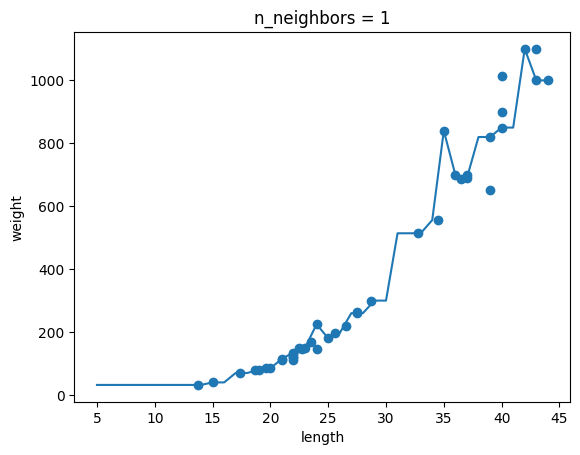

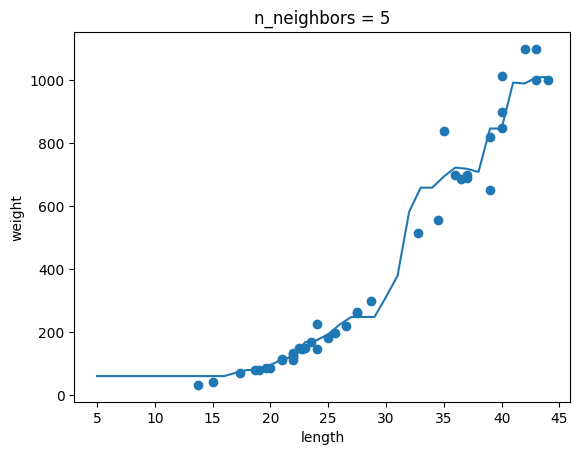

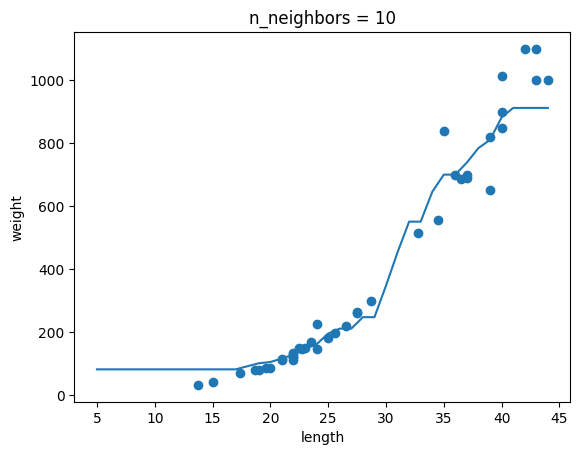

In [31]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()